---

# Lecture 4.1. Gradient Descent

As observed in a previous lecture, we may train a single neurons weights and bias by iteratively applying a predefined rule. The description that we gave for the perceptron update rule was intended to hint at a more general rule for *optimizing the cost function of a model*. More specifically, we were hinting at a general continuous optimization technique called **gradient descent**. 

In order to understand gradient descent we will need to import the following python packages and define a simple function of one variable. 
```python
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Seaborn theme for plots
sns.set_theme()

# Define test function for experimenting
def f(w):
    return (w - 2)**2  + 1

# Define domain variables for plotting f
domain = np.linspace(-2, 6, 50)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 2)^2 + 1")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)
plt.show()
```


---

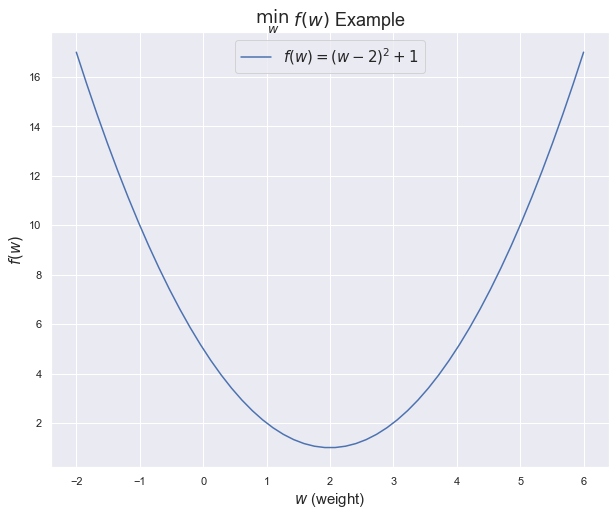

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Seaborn theme for plots
sns.set_theme()

# Define test function for experimenting
def f(w):
    return (w - 2)**2  + 1

# Define domain variables for plotting f
domain = np.linspace(-2, 6, 50)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)
plt.show()

---

## 4.1.1 The Problem Description

Clearly the function $f(w) = (w - 2)^2 + 1$ has a **global minimum** at $w = 2$. Supposing we did not already know the answer..., this notebook will describe how to find this minimum value for $f(w)$. More specifically, we wish to solve
$$
\min_{w\in \mathbb{R}} f(w) \:\:\:\:\:\:\:\:\:\: (\text{PROBLEM 1})
$$

This class of problems falls into the reahlm of *unconstrained continuous optimization*. For those of you that are more mathematically inclined, see the excellent and classic text of [Nocedal and Wright](http://egrcc.github.io/docs/math/numerical-optimization.pdf) for an in-depth treatment of the subject.

The treatment of PROBLEM 1 given by Nocedal and Wright is extensive and goes much further than what is currently implemented in machine learning. We will focus on the notion of using the *gradient* (the generalization of the single variable function derivative) in order to "search" for plausable minimum of a function. 

### Start with a Guess
Suppose we first guess that the minimum value of $f(w)$ occurs at $w_0 = 5$. We can visualize the point $(5, f(5))$ by running the following code in the cell below. 
```python
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
plt.scatter([5], [f(5)], color = "magenta", label = "$w_0$: initial guess")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()
```

---

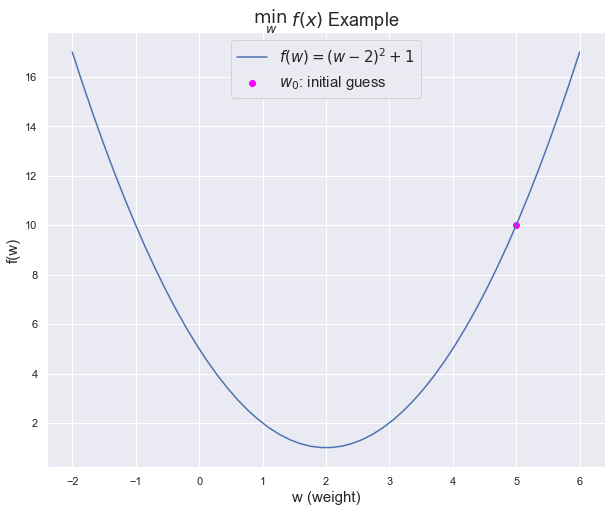

In [4]:
# Initial guess for optimal w
w_0 = 5.0

plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
plt.scatter([w_0], [f(w_0)], color = "magenta", label = "$w_0$: initial guess")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

---


### The General Idea 
The general idea behind gradient descent is to use the gradient (the derivative for single variable functions) to *provide a direction to explore* (this means gradient descent is a *first-order method*). For example, with our function $f$ and initial guess $w_0 = 5$, suppose we are able to calculate the value of the *gradient* (the derivative) of $f$ at $w_0 = 5$. This numerical value will give us the *slope of the tangent line* to $f$ at $w_0$. Note that $f'(w) = 2(w - 2)$. We can even visualize this tangent line by running the following code in the cell below. 
```python
# Define parabola derivative
def df(w): 
    return 2*(w - 2)

# Choose w_0
w_0 = 5.0

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    # Define tangent line
    # y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)
    
    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            'C1--', 
            linewidth = 1, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"w_{i}")

# Plot the figure
plt.figure(figsize = (10, 8))
# Plot the function
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
# Visualize the tangent line
tangent_line(w_0, f, df)

# Label the figure
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()
```



---

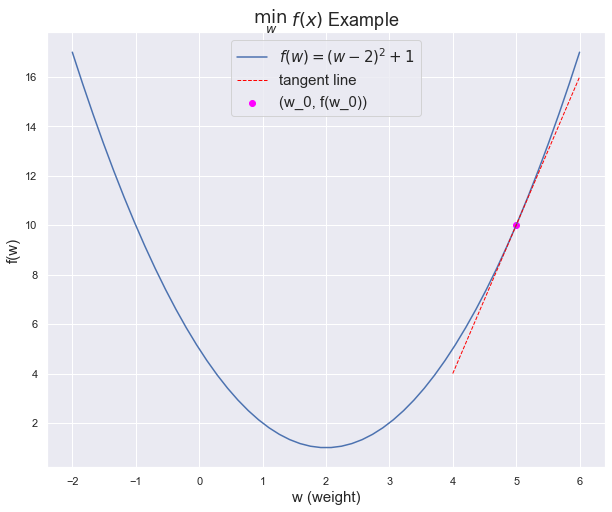

In [5]:
# Define parabola derivative
def df(w): 
    return 2*(w - 2)

# Choose w_0
w_0 = 5.0

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    # Define tangent line
    # y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            'C1--', 
            linewidth = 1, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"(w_{i}, f(w_{i}))")

# Plot the figure
plt.figure(figsize = (10, 8))
# Plot the function
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
# Visualize the tangent line
tangent_line(w_0, f, df)

# Label the figure
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

---

## 4.1.2 Direction of Descet and the Learning Rate

Observing the figure generated by the code above, notice that the tangent line is pointing in the direction of descent, i.e., starting at $w_0 = 5$, the tangent line having positive slope indicates that we need move in the negative direction (to the left of $w_0$) if we wish to move to a smaller value of $f$. That is, **we need to move in the direction implied by the opposite sign of the derivtaive of $f$ at $w_0 = 5$**.

### But how far should we move? 
The value of how far to move in the opposite sign of the gradient of $f$ at $w_0 = 5$ from $w_0$ is called the **learning rate** (Nocedal & Wright call this parameter the **step length**), typically denoted by $\alpha$. In gradient descent this value is multiplied with the gradient of $f$ at $w_0$ (the derivative for one variable), and then a new choice of $w$, say $w_1$ is assigned the value:
$$
w_1 = w_0 - \alpha f'(w_0) \:\:\:\:\:\:\:\:\:\: (\text{Gradient Descent Update Rule for a Function of one Variable})
$$

The choice of $\alpha$ in machine learning is typically found by experimentation, though more sophesticated techniques are available, such as *line-search* and *trust-region* methods (again see Nocedal & Wright). 

For example, lets choose $\alpha = 0.8$ and run the following code in the cell below. 
```python
# Initialize choice of w
w_0 = 5.0

# Set learning rate 
alpha = .8

# Moving in the opposite direction of the derivative at w_0
w_1 = w_0 - alpha*df(w_0)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()
```

---

w_0 = 5.0
w_1 = 0.1999999999999993


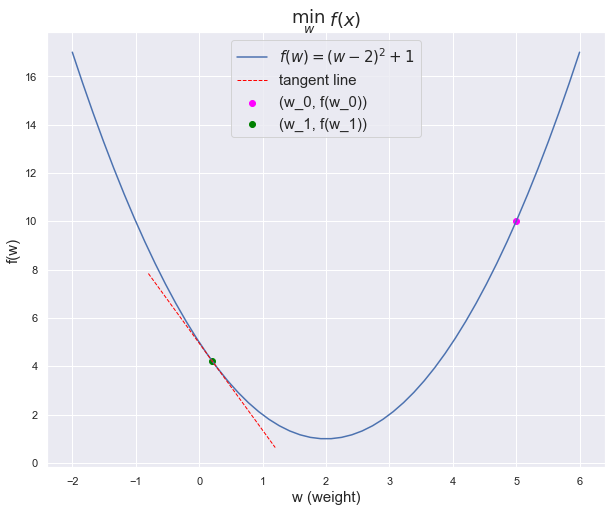

In [6]:
# Initialize choice of w
w_0 = 5.0

# Set learning rate 
alpha = .8

# Moving in the opposite direction of the derivative at w_0
w_1 = w_0 - alpha*df(w_0)

print(f"{w_0 = }")
print(f"{w_1 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

---

Notice that the new guess $w_1$ gives a new pair $(w_1, f(w_1))$ which is a better choice of a both a *extrema* and minimum value for $f$ than the initial guess $w_0$ would have given. **We are moving downhill on the function $f$.** Let us move again and see where we end up by running the following code in the cell below. 
```python
# Moving in the opposite direction of the derivative at w_0
w_2 = w_1 - alpha*df(w_1)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()
```

---

w_0 = 5.0
w_1 = 0.1999999999999993
w_2 = 3.0800000000000005


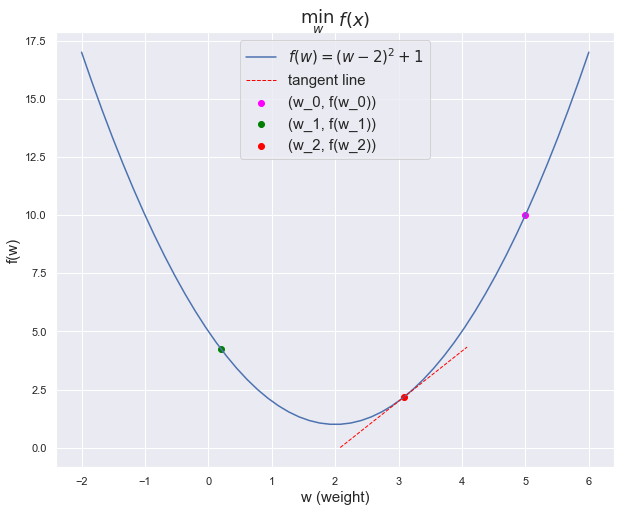

In [8]:
# Moving in the opposite direction of the derivative at w_0
w_2 = w_1 - alpha*df(w_1)

print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

---

And one more time by running the following code in the cell below.
```python
# Moving in the opposite direction of the derivative at w_0
w_3 = w_2 - alpha*df(w_2)


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red", show = False)
tangent_line(w_3, f, df, i = 3, color = "purple")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()
```


---

w_0 = 5.0
w_1 = 0.1999999999999993
w_2 = 3.0800000000000005
w_3 = 1.3519999999999996


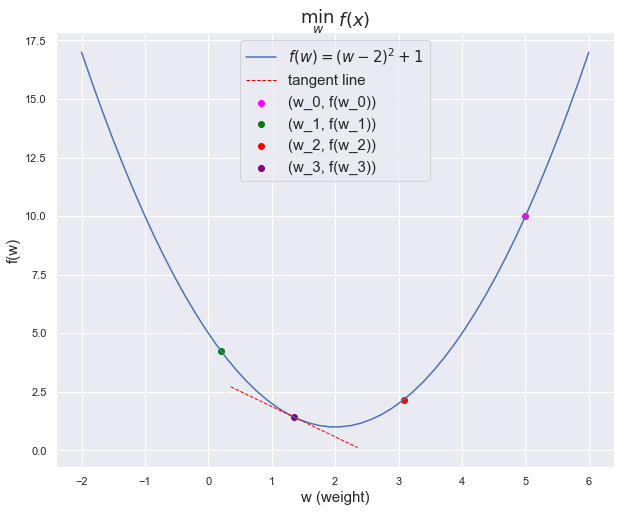

In [9]:
# Moving in the opposite direction of the derivative at w_0
w_3 = w_2 - alpha*df(w_2)

print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")
print(f"{w_3 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red", show = False)
tangent_line(w_3, f, df, i = 3, color = "purple")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

---

We can easily iterate this process of updating $w_i$ by writing a function called ```gradient_descent```. Try running the following code in the cell below. 
```python
def gradient_descent(derivative, alpha = 0.8, w_0 = 5.0, max_iter = 1_000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = gradient_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 2)} | df(w_{i}) = {df(w)}")
print("")


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
plt.scatter(W, f(W), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()
```

---

In [2]:
def gradient_descent(derivative, alpha = 0.8, w_0 = 5.0, max_iter = 1_000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = gradient_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 2)} | df(w_{i}) = {df(w)}")
print("")


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
plt.scatter(W, f(W), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()

NameError: name 'df' is not defined

---

## Testing different choices of $\alpha$
We can test how well our choice of the learning rate $\alpha$ was by comparing it to different choices of $\alpha$. Try running the following code in the cell below. What do you observe?
```python
# Possible choices of learning rate 
alphas = [0.1, 0.5, 0.8, 0.9]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = gradient_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
```

---

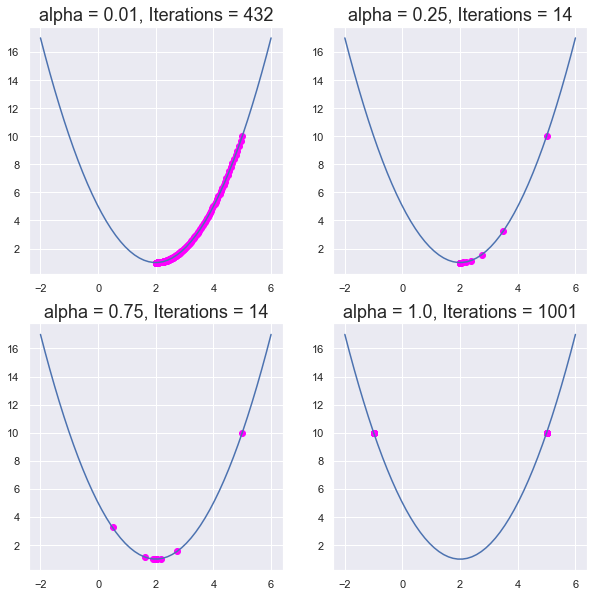

In [12]:
# Possible choices of learning rate 
alphas = [0.01, 0.25, 0.75, 1.0]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = gradient_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)

---

One very important note to make with this example is that gradient descent will always converge to a *global optimal* solution for any *convex function*, such as the quadratic function we have been playing with. This is not always the case as can be seen with the following code, of which you should run in the cell below. 

Note *finite-difference approx.* for a derivative:
$$
f'(w) \approx \frac{f(w + h) - f(w)}{h}
$$
for small $h$. 

```python
def C(w):
    return (w**2*np.cos(w) - w)/10

def dC(w, h = 0.001):
    return (C(w + h) - C(w))/h

W = gradient_descent(dC, alpha = 0.8, w_0 = 10, max_iter=5_000)

# New domain 
domain = np.linspace(-15, 15, 100)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, C(domain), label = "$C(w) = (w^2\cos(w) - w)/10$")
tangent_line(W[-1], C, dC, i = len(W))

plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$C(w)$", fontsize = 15)
plt.legend(fontsize = 15)
plt.title(f"alpha = {alpha}, w_0 = {W[0]}, Iterations = {len(W)}", fontsize = 18)
plt.annotate("Local Minima", (W[-1], C(W[-1])), horizontalalignment='right', verticalalignment='top')
plt.show()
```

---

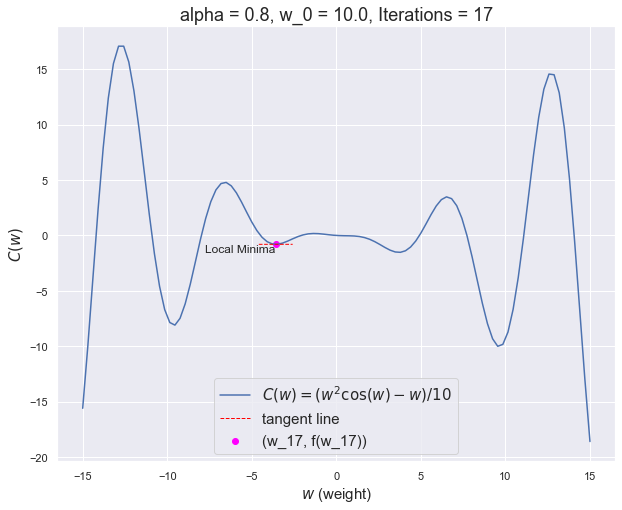

In [14]:
def C(w):
    return (w**2*np.cos(w) - w)/10

def dC(w, h = 0.001):
    return (C(w + h) - C(w))/h

W = gradient_descent(dC, alpha = 0.8, w_0 = 10, max_iter=5_000)

# New domain 
domain = np.linspace(-15, 15, 100)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, C(domain), label = "$C(w) = (w^2\cos(w) - w)/10$")
tangent_line(W[-1], C, dC, i = len(W))

plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$C(w)$", fontsize = 15)
plt.legend(fontsize = 15)
plt.title(f"alpha = {.8}, w_0 = {W[0]}, Iterations = {len(W)}", fontsize = 18)
plt.annotate("Local Minima", (W[-1], C(W[-1])), horizontalalignment='right', verticalalignment='top')
plt.show()

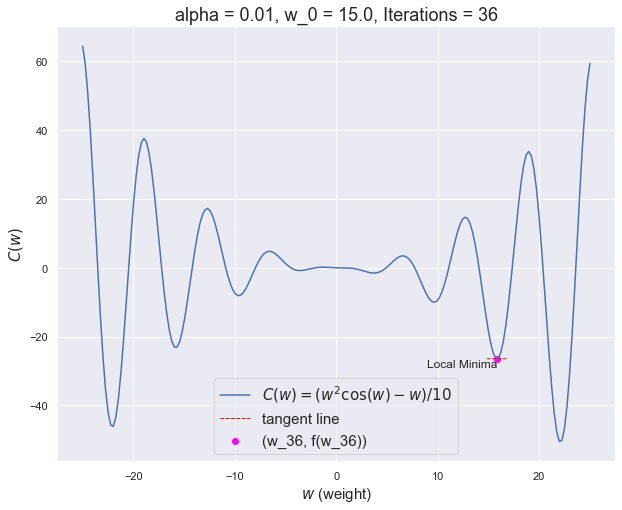

In [15]:
W = gradient_descent(dC, alpha = 0.01, w_0 = 15, max_iter=5_000)

# New domain 
domain = np.linspace(-25, 25, 200)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, C(domain), label = "$C(w) = (w^2\cos(w) - w)/10$")
tangent_line(W[-1], C, dC, i = len(W))

plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$C(w)$", fontsize = 15)
plt.legend(fontsize = 15)
plt.title(f"alpha = {0.01}, w_0 = {W[0]}, Iterations = {len(W)}", fontsize = 18)
plt.annotate("Local Minima", (W[-1], C(W[-1])), horizontalalignment='right', verticalalignment='top')
plt.show()

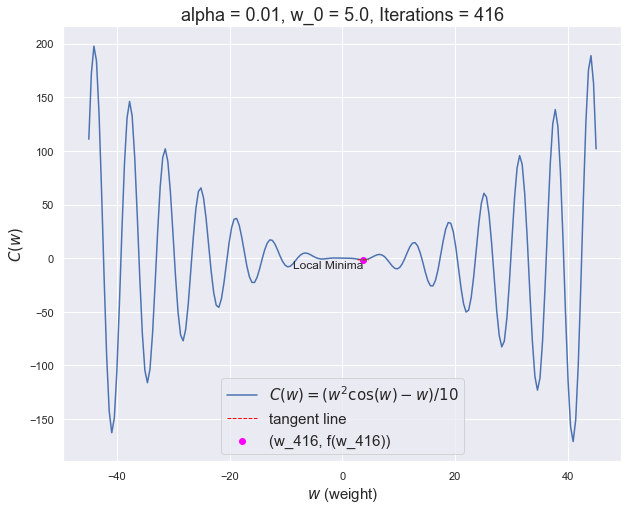

In [17]:

W = gradient_descent(dC, alpha = 0.01, w_0 = 5, max_iter=5_000)

# New domain 
domain = np.linspace(-45, 45, 200)

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, C(domain), label = "$C(w) = (w^2\cos(w) - w)/10$")
tangent_line(W[-1], C, dC, i = len(W))

plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$C(w)$", fontsize = 15)
plt.legend(fontsize = 15)
plt.title(f"alpha = {0.01}, w_0 = {W[0]}, Iterations = {len(W)}", fontsize = 18)
plt.annotate("Local Minima", (W[-1], C(W[-1])), horizontalalignment='right', verticalalignment='top')
plt.show()